# All KNN

[Machine Learning with Imbalanced Data - Course]

- Adapts the functionality of Edited Nearest Neighbours in that, at each round, it increases the number of neighbours utilised to exclude or retain the observations. 
- It starts by looking at the 1 closest neighbour. 
- It finishes at a maximum number of neighbours to examine, determined by the user
- it stops prematurely if the majority class becomes the minority


AllKNN is a repetition of ENN, starting by examining the 1 closest neighbour and increasing the neighbourhood by 1 at each round.

The repetitions stop after examining the maximum number of neighbours entered by the user, or when a class disappears or becomes the minority, whatever happens first.

Adding a neighbour at each iteration makes the criteria for a sample to be retained harder and harder, therefore removing more observations that are closer to the boundary to the minority class.

In this notebook, we will compare ENN, RENN, and AllKNN.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import (
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN
)

## Create data

We will create data where the classes have different degrees of separateness.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [2]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

## Undersample with AllKNN

[AllKNN](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.AllKNN.html)


### Well separated classes

In [3]:
# create data

X, y = make_data(sep=2)

# set up All KNN

# as we set it up below, it will start by examining the 
# 1 closest neighbour and end when it examined the 5 
# closest neighbours

allknn = AllKNN(
    sampling_strategy='auto',  # undersamples only the majority class
    n_neighbors=5, # the maximum size of the neighbourhood to examine
    kind_sel='all',  # all neighbours need to have the same label as the observation examined
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = allknn.fit_resample(X, y)

In [4]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [5]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((954, 2), (954,))

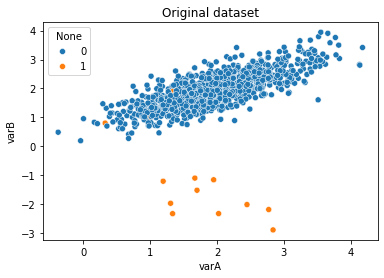

In [6]:
# plot original data

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

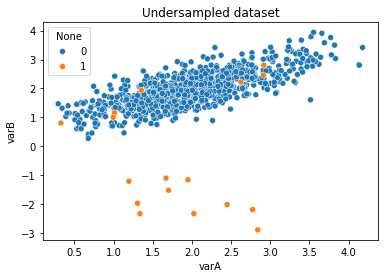

In [7]:
# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset')
plt.show()

Note how some yellow dots can now be seen clearer, as their neighbouring observations from the other class were removed from the data set.

### Partially separated classes

Let's repeat the same exercise in data where the classes are not so clearly separated. 

In [8]:
# create data
X, y = make_data(sep=0.1)

# set up All KNN

# as we set it up below, it will start by examining the 
# 1 closest neighbour and end when it examined the 5 
# closest neighbours

allknn = AllKNN(
    sampling_strategy='auto',  # resamples the majority class
    n_neighbors=3, # the maximum size of the neighbourhood to examine
    kind_sel='all',  # all neighbours need to agree
    n_jobs=4)  # I have 4 cores in my laptop


X_resampled, y_resampled = allknn.fit_resample(X, y)

In [9]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# undersampled data

X_resampled.shape, y_resampled.shape

((945, 2), (945,))

As the classes are not so clearly distinguished, more samples were removed from the dataset.

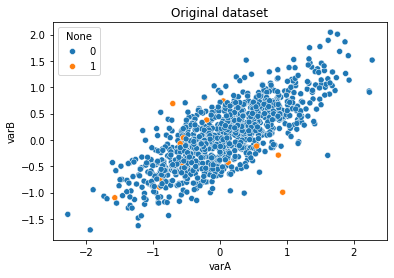

In [11]:
# plot original data

sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )

plt.title('Original dataset')
plt.show()

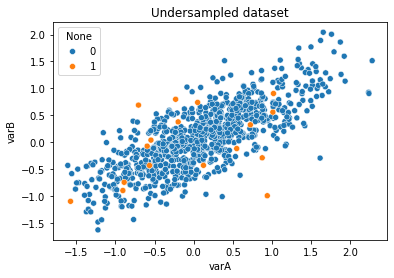

In [12]:
# plot undersampled data

sns.scatterplot(
        data=X_resampled, x="varA", y="varB", hue=y_resampled
    )

plt.title('Undersampled dataset') 
plt.show()

Notice again, that observations have been cleared from the surroundings of those of the minority class. 

The closer the classes are, the more observations that are removed.

## All KNN

### Real data - Performance comparison

Does it work well with real datasets? 

Well, it will depend on the dataset, so we need to try and compare the models built on the whole dataset, and that built on the undersampled dataset.

In [13]:
# load data
# only a few observations to speed the computaton

data = pd.read_csv('../kdd2004.csv').sample(10000, random_state=10)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
76689,36.51,31.00,0.22,-50.5,28.5,1775.5,0.74,1.66,-11.5,-87.5,...,1478.4,0.19,4.55,5.0,-127.0,1029.8,0.39,0.47,0.44,-1
61613,87.56,25.79,0.73,-24.0,6.5,2078.1,-0.61,1.00,7.5,-86.5,...,1549.9,0.30,-2.28,-17.0,-89.0,906.4,0.34,0.30,0.21,-1
14280,43.55,24.14,-2.09,-68.0,37.0,438.0,1.76,-0.02,-6.0,-55.0,...,-63.0,1.83,0.92,2.0,-46.0,182.5,-1.12,0.15,0.19,-1
61672,39.17,28.24,0.86,-13.0,-25.5,2326.5,0.94,0.04,-1.0,-81.5,...,1995.8,0.39,-4.37,-23.0,-54.0,188.8,2.80,0.55,0.47,-1
70728,88.80,22.52,0.89,5.0,-30.0,620.9,1.12,0.19,-4.0,-66.0,...,751.9,-0.22,-0.39,-4.0,-41.0,337.5,0.77,0.25,0.39,-1


In [14]:
# imbalanced target

data.target.value_counts() / len(data)

target
-1    0.9913
 1    0.0087
Name: count, dtype: float64

In [15]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

In [16]:
# edited nearest neighbours

enn = EditedNearestNeighbours(
    sampling_strategy='auto',  # resamples the majority class
    n_neighbors=5, # the number of neighbours that need to agree
    kind_sel='all',  # most neighbours need to agree
    n_jobs=4)  # I have 4 cores in my laptop

X_enn, y_enn = enn.fit_resample(X_train, y_train)

In [17]:
# repeated NN

renn = RepeatedEditedNearestNeighbours(
    sampling_strategy='auto',
    n_neighbors=5, # the number of neighbours that need to agree
    kind_sel='all',  # most neighbours need to agree
    n_jobs=4,
    max_iter=100)  # I have 4 cores in my laptop

X_renn, y_renn = renn.fit_resample(X_train, y_train)

In [18]:
# All KNN

allknn = AllKNN(
    sampling_strategy='auto',
    n_neighbors=5, # the maximum size of the neighbourhood that will be examined
    kind_sel='all', # most neighbours need to agree
    n_jobs=4,
)  

X_allknn, y_allknn = allknn.fit_resample(X_train, y_train)

In [19]:
# compare shapes

X_train.shape, X_enn.shape, X_renn.shape, X_allknn.shape

((7000, 74), (6905, 74), (6882, 74), (6887, 74))

## Machine learning performance comparison

Let's compare model performance with and without undersampling.

In [20]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [21]:
# evaluate performance of algorithm built
# using imbalanced dataset

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9946325648414985
Test set
Random Forests roc-auc: 0.983555705049146


In [22]:
# evaluate performance of algorithm built
# using enn undersampled dataset

run_randomForests(X_enn,
                  X_test,
                  y_enn,
                  y_test)

Train set
Random Forests roc-auc: 0.995517409301193
Test set
Random Forests roc-auc: 0.9758817007387475


In [23]:
# evaluate performance of algorithm built
# using renn undersampled dataset

run_randomForests(X_renn,
                  X_test,
                  y_renn,
                  y_test)

Train set
Random Forests roc-auc: 0.991085214502101
Test set
Random Forests roc-auc: 0.9854742061267457


In [24]:
# evaluate performance of algorithm built
# using renn undersampled dataset

run_randomForests(X_allknn,
                  X_test,
                  y_allknn,
                  y_test)

Train set
Random Forests roc-auc: 0.9934329378448318
Test set
Random Forests roc-auc: 0.9794570891106377


There doesn't seem to be a huge change in performance with these algorithms on this dataset.

In [2]:
# Let's generate random imbalanced data and apply the AllKNN technique.

import numpy as np
import pandas as pd
from imblearn.under_sampling import AllKNN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from collections import Counter

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic imbalanced data
n_samples = 1000
n_features = 10
X = np.random.randn(n_samples, n_features)

# Create imbalanced target with 80% of class 0 and 20% of class 1
y = np.concatenate([np.zeros(int(0.8 * n_samples)), np.ones(int(0.2 * n_samples))])

# Shuffle the data to mix the classes
indices = np.random.permutation(n_samples)
X, y = X[indices], y[indices]

# Create a DataFrame to mimic real data
data = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(n_features)])
data['target'] = y

# Check the class distribution before applying AllKNN
print("Class distribution before AllKNN:", Counter(data['target']))

# Apply AllKNN for data cleaning
allknn = AllKNN(sampling_strategy='auto', n_neighbors=3)
X_res, y_res = allknn.fit_resample(data.drop('target', axis=1), data['target'])

# Check the class distribution after applying AllKNN
print("Class distribution after AllKNN:", Counter(y_res))

# Split the cleaned data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred = model.predict(X_test)

# Evaluate the model using classification report
classification_report_result = classification_report(y_test, y_pred)
print(classification_report_result)


Class distribution before AllKNN: Counter({0.0: 800, 1.0: 200})
Class distribution after AllKNN: Counter({0.0: 250, 1.0: 200})
              precision    recall  f1-score   support

         0.0       0.62      0.66      0.64        50
         1.0       0.54      0.50      0.52        40

    accuracy                           0.59        90
   macro avg       0.58      0.58      0.58        90
weighted avg       0.59      0.59      0.59        90



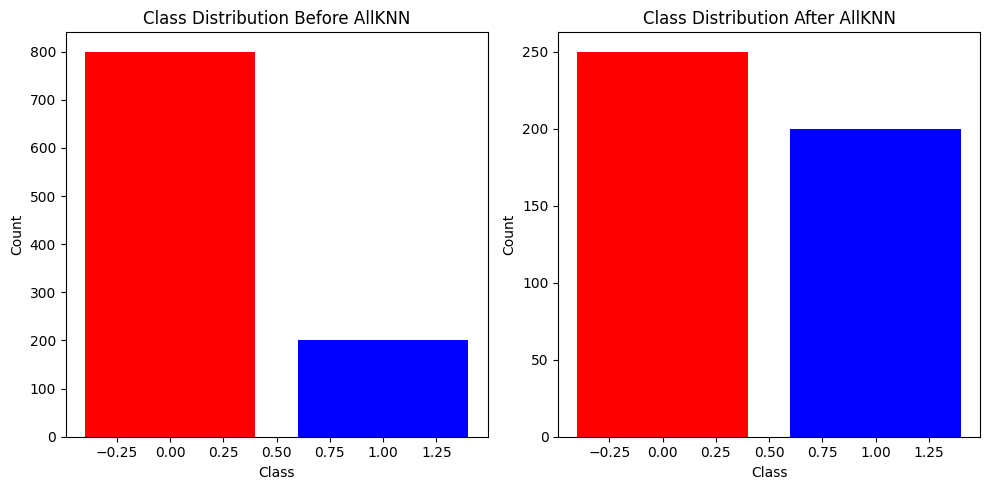

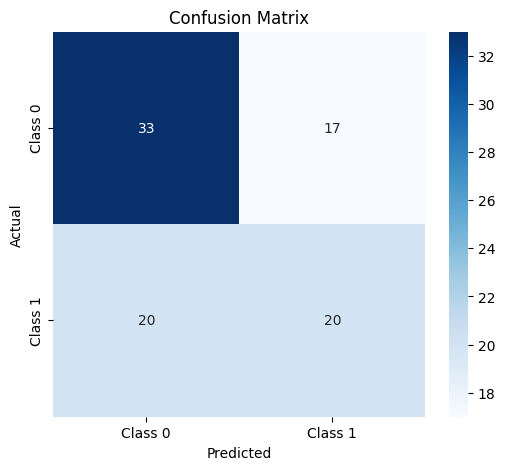

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Check the class distribution before applying AllKNN
class_dist_before = Counter(data['target'])

# Plotting class distribution before AllKNN
plt.figure(figsize=(10, 5))

# Plot class distribution before AllKNN
plt.subplot(1, 2, 1)
plt.bar(class_dist_before.keys(), class_dist_before.values(), color=['red', 'blue'])
plt.title("Class Distribution Before AllKNN")
plt.xlabel("Class")
plt.ylabel("Count")

# Plotting class distribution after AllKNN
class_dist_after = Counter(y_res)

plt.subplot(1, 2, 2)
plt.bar(class_dist_after.keys(), class_dist_after.values(), color=['red', 'blue'])
plt.title("Class Distribution After AllKNN")
plt.xlabel("Class")
plt.ylabel("Count")

# Show the plot
plt.tight_layout()
plt.show()

# Generating confusion matrix for classification report
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


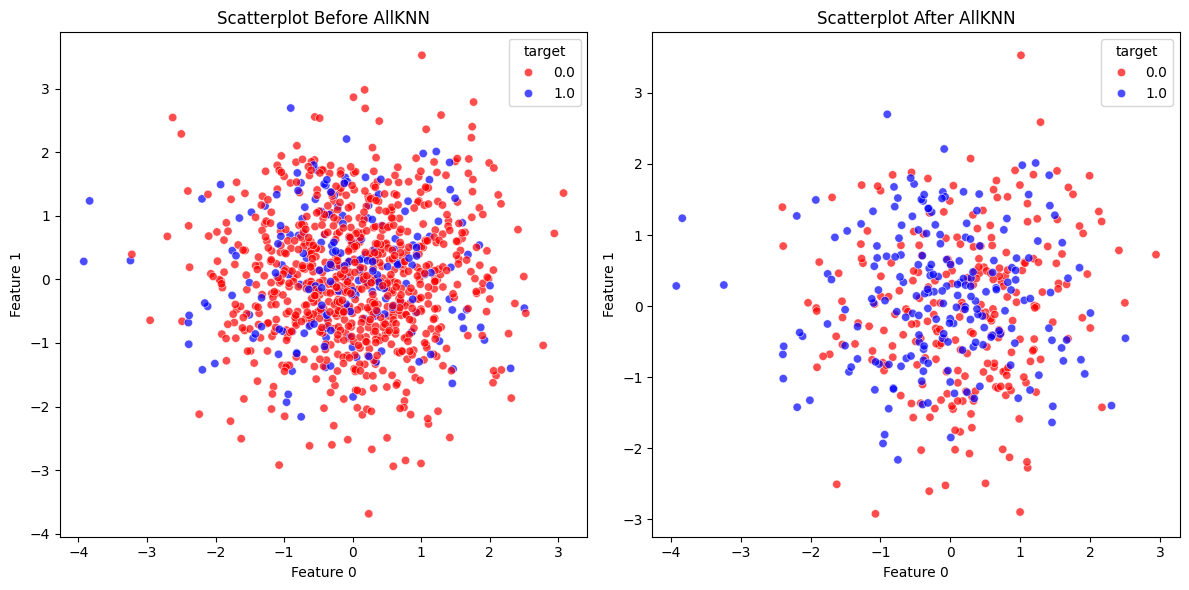

In [5]:
# Select two features for visualization (for simplicity, we pick the first two features)
feature_x_after = X_res['feature_0']  # First feature after applying AllKNN
feature_y_after = X_res['feature_1']  # Second feature after applying AllKNN

# Create a figure for plotting
plt.figure(figsize=(12, 6))

# Scatterplot before AllKNN
plt.subplot(1, 2, 1)
sns.scatterplot(x=feature_x_before, y=feature_y_before, hue=data['target'], palette={0: 'red', 1: 'blue'}, alpha=0.7)
plt.title('Scatterplot Before AllKNN')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Scatterplot after AllKNN
plt.subplot(1, 2, 2)
sns.scatterplot(x=feature_x_after, y=feature_y_after, hue=y_res, palette={0: 'red', 1: 'blue'}, alpha=0.7)
plt.title('Scatterplot After AllKNN')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Show the plots
plt.tight_layout()
plt.show()
